In [2]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read dataframe
df = pd.read_csv('heart2.csv')
print(df)
x = df.drop(columns=["target", "Unnamed: 0"])
y = np.array(df["target"]).reshape(-1, 1)

     Unnamed: 0  age  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             0   63   3       145   233    1        0      150      0   
1             1   37   2       130   250    0        1      187      0   
2             2   41   1       130   204    0        0      172      0   
3             3   56   1       120   236    0        1      178      0   
4             4   57   0       120   354    0        1      163      1   
..          ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         298   57   0       140   241    0        1      123      1   
299         299   45   3       110   264    0        1      132      0   
300         300   68   0       144   193    1        1      141      0   
301         301   57   0       130   131    0        1      115      1   
302         302   57   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  target  
0        2.3      0   0     1       1  
1        3.5      0   0     2  

<AxesSubplot:xlabel='chol', ylabel='thalach'>

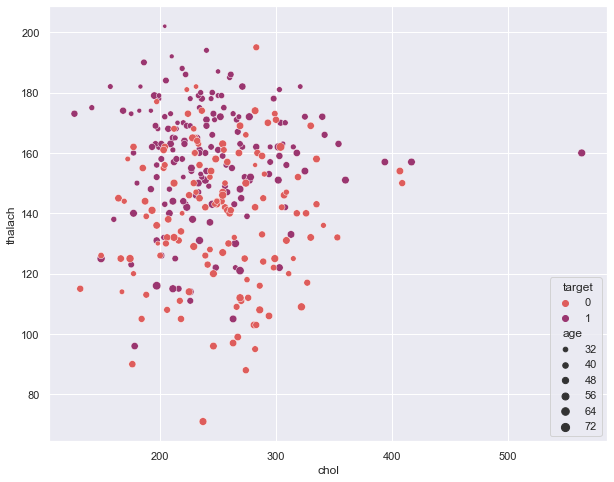

In [4]:
# scatter
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='chol', y='thalach', hue='target', size='age', palette='flare')

## Logistic Regression from scratch

In [5]:
# y = wx + b with init values w0, b0    

class LogisticRegressor:
    def __init__(self, learning_rate, n, num_features):
        self.learning_rate = learning_rate
        self.num_sample = n
        self.w = np.random.randn(1, num_features) / 1000
        self.b = 0

    def hypothesis_fn(self, feature):
        print((np.dot(feature, self.w.T) + self.b)[0])
        return self.sigmoid(np.dot(feature, self.w.T) + self.b)

    def loss_fn(self, y_hat, y):
        return np.sum(-y*np.log(y_hat+1e-9) + -(1-y) * np.log(1-y_hat+1e-9))
        #return np.sum((pred_y - target) ** 2) / self.n 
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
            
    def gd_fn(self, feature, y_hat, y):
        w_prime = np.sum((y - y_hat) * feature, axis=0) / self.num_sample
        b_prime = np.sum((y- y_hat), axis=0) / self.num_sample
        #w_prime = np.sum((pred_y - target) * feature) / self.n
        #b_prime = np.sum((pred_y - target) * 1) / self.n

        return w_prime.reshape(1, -1), b_prime

    def predict(self, feature):
        return self.sigmoid(np.dot(feature, self.w.T) + self.b)

    def fit(self, num_iter, feature, target):
        loss_l = []
        for e in range(num_iter):
            y_hat = self.hypothesis_fn(feature)
            loss = self.loss_fn(y_hat, target)
            w_prime, b_prime = self.gd_fn(feature, y_hat, target)
            
            self.w = self.w - self.learning_rate * w_prime
            self.b = self.b - self.learning_rate * b_prime

            loss_l.append(loss)

        return loss_l, self.w, self.b

[-0.55035425]
[-6.04055124]
[-22.83125484]
[-39.70657004]
[-56.5818853]
[-73.45720056]
[-90.33251582]
[-107.20783108]
[-124.08314634]
[-140.9584616]
[-157.83377686]
[-174.70909212]
[-191.58440738]
[-208.45972264]
[-225.3350379]
[-242.21035316]
[-259.08566842]
[-275.96098368]
[-292.83629894]
[-309.7116142]


Text(0, 0.5, 'loss')

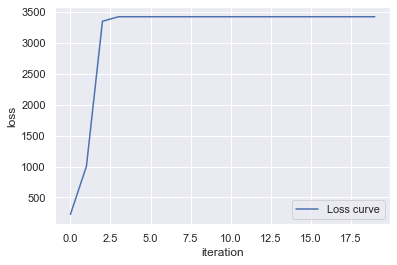

In [6]:
# plot loss
n = 300
alpha = 0.0003
linear_log = LogisticRegressor(learning_rate=alpha, n=n, num_features=12)
loss_lst, w, b = linear_log.fit(20, feature=np.array(x), target=y)

plt.plot(loss_lst, label='Loss curve')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [7]:
# w and b
print(f"Fitted w and b: {w}, {b}")
print(f"True w and b: {100}, {50}")

Fitted w and b: [[-1.69424791e-01 -6.21722721e-03 -4.12531293e-01 -7.73267969e-01
  -6.05448608e-04 -2.63340698e-03 -5.05922429e-01 -2.77025074e-04
  -2.30763739e-03 -2.87776880e-03 -1.66047626e-03 -8.57717349e-03]], [-0.00318719]
True w and b: 100, 50


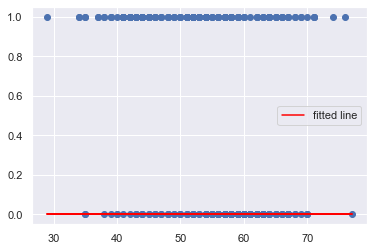

In [8]:
# plot pred
plt.scatter(df['age'], df['target'])
plt.plot(df['age'], linear_log.predict(x), color= 'red', label='fitted line')
plt.legend()